# Project Name - Bike Sharing Demand Predictionn

## Project Type - Regression
## Contribution - Individual
## Name - Harshad Humane
## GitHub Link:

## Bussiness context -
- Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## Problem statement -
- The project aims to enhance urban mobility by optimizing the supply of rental bikes. By predicting the hourly demand for bikes, we aim to ensure their availability and accessibility, thereby reducing waiting times and improving user comfort.

### Import library

In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn import metrics, preprocessing
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [588]:
data = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Desktop\\My Content\\Data science\\Datasets\\SeoulBikeData.csv', encoding= 'unicode_escape')

In [589]:
# copying the dataset
df = data.copy()

### Knowing your data

In [590]:
# first look of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [591]:
# bottom look of dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [592]:
# random sample from dataset
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3260,15/04/2018,297,20,10.3,62,2.0,1749,3.3,0.0,0.0,0.0,Spring,No Holiday,Yes
3119,09/04/2018,623,23,9.6,43,1.2,1333,-2.3,0.0,0.0,0.0,Spring,No Holiday,Yes
1614,06/02/2018,94,6,-12.5,40,3.4,1991,-23.3,0.0,0.0,0.0,Winter,No Holiday,Yes
8664,27/11/2018,496,0,4.9,79,0.5,391,1.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
5205,05/07/2018,2063,21,25.2,67,1.5,2000,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes


In [593]:
# shape of the dataset
print(f'Shape of the dataset, Rows: {df.shape[0]}, columns: {df.shape[1]}.')

Shape of the dataset, Rows: 8760, columns: 14.


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Understanding the variables

In [595]:
# Dataset's attributes
df.columns.tolist()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

#### Attributes information:

- Date : year-month-day  

- Rented Bike count - Count of bikes rented at each hour  

- Hour - Hour of he day

- Temperature-Temperature in Celsius

- Humidity - %

- Windspeed - m/s

- Visibility - 10m

- Dew point temperature - Celsius

- Solar radiation - MJ/m2

- Rainfall - mm

- Snowfall - cm

- Seasons - Winter, Spring, Summer, Autumn

- Holiday - Holiday/No holiday

- Functional Day - If the day is a Functioning Day or not

In [596]:
# statistical description of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [597]:
# statistical description of non-numeric columns
df.describe(include=['object']).T

,count,unique,top,freq
Date,8760,365,01/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


In [598]:
# checking for unique values 
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [599]:
# mentioning the numeric columns
df.select_dtypes(include=['int64','float64']).columns.tolist()

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [600]:
# mentioning the non-numeric columns
df.select_dtypes('object').columns.tolist()

['Date', 'Seasons', 'Holiday', 'Functioning Day']

### Data preprocessing

In [601]:
# Checking for Null and Duplicate values

In [602]:
# checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

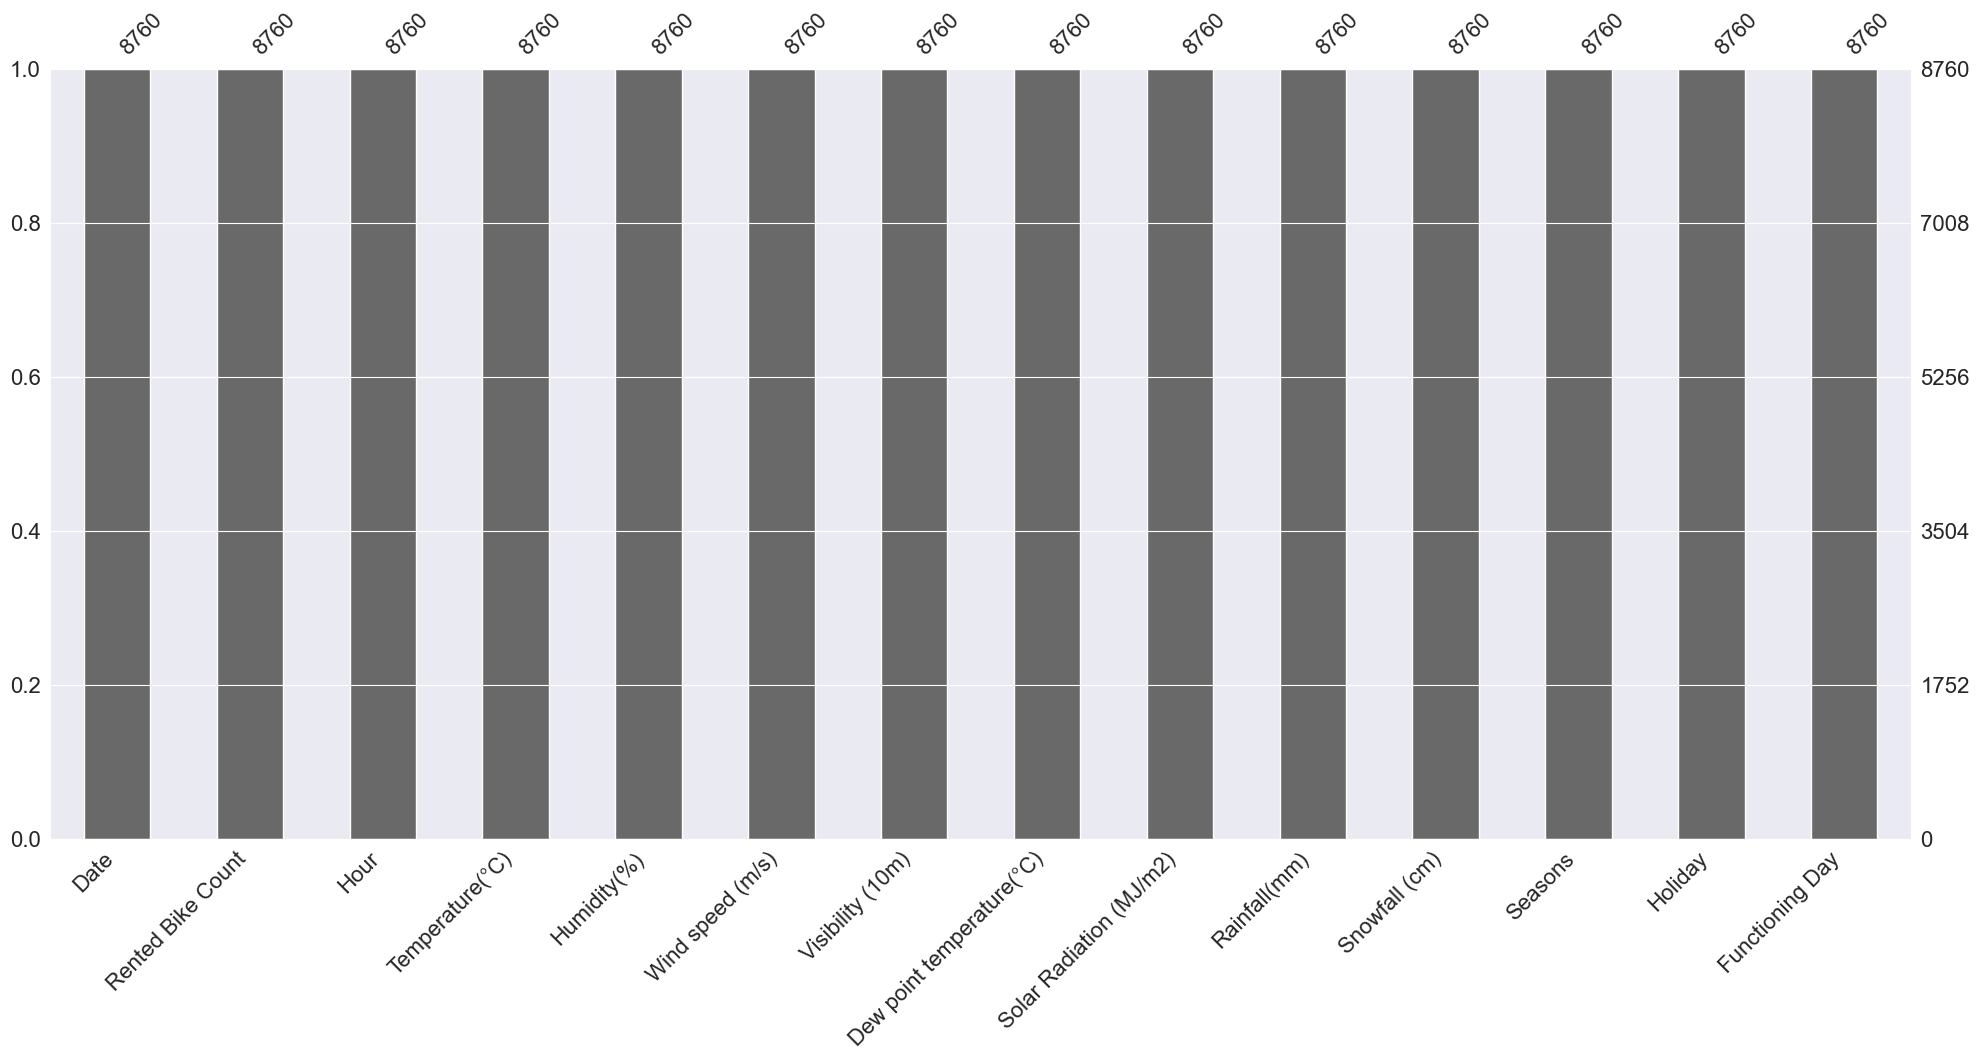

In [603]:
# displaying missing value existance.
msno.bar(df)
plt.show()

*~ Observation: As mentioned above there zero'0' null values.*

In [604]:
# checking duplicate values
df.duplicated().sum()

0

*~ Observation: As mentioned above there zero'0' duplicated values.*

In [605]:
# For simplification changing the attribute names

In [606]:
df = df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'wind speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew point temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '
                       })

In [607]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [608]:
# Munipulating the date column

In [609]:
# Changing the format data column object to datatime
df['Date'] = pd.to_datetime(df['Date'])

In [610]:
# separating the day,month and year from date column for simplification
df['Day'] = df['Date'].dt.day

df['Month'] = df['Date'].dt.month_name()

df['Year'] = df['Date'].dt.year

In [611]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017


In [612]:
# droping column date
df.drop(columns='Date',inplace = True)

### Data exploration analysis 

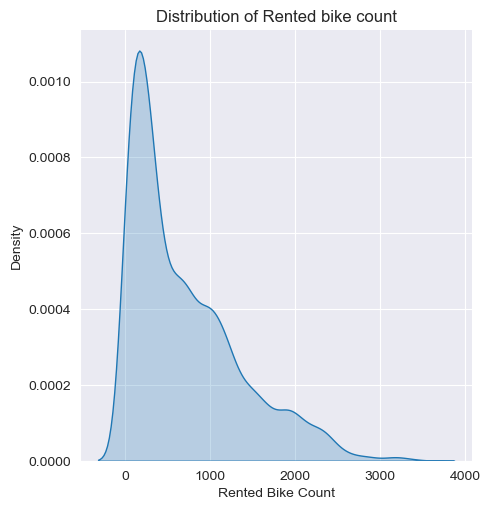

In [613]:
# Rented bike count analysis
sns.set_style("darkgrid")
sns.displot(data=df,x='Rented Bike Count',fill=True,kind='kde')
plt.title('Distribution of Rented bike count')
plt.show()

*~ Observations:*
- The density plot of rented bike counts exhibits a right-skewed distribution, with a prominent peak at lower counts and a long tail towards higher counts, signifying frequent occurrences of few bike rentals and rare instances of substantial rental numbers.

#### 1.Seasons

##### Count of Season respectively:

In [614]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

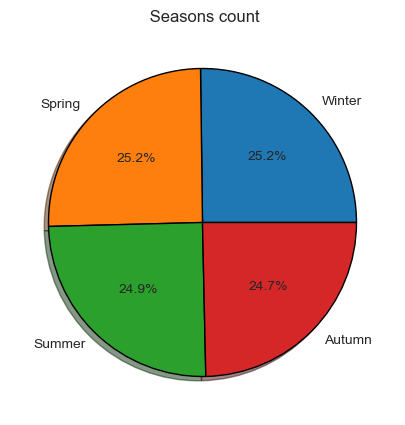

In [615]:
# displaying pie chart seasons
plt.figure(figsize=(8,5))

slices = df['Seasons'].value_counts().values.tolist()
labels = df['Seasons'].unique()
# colors = ['#00FFFF','#FFFF00','#0000FF','#00FF00']

plt.pie(slices, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'black'})
plt.title(' Seasons count')
plt.show()

##### Count of Rented bike on Seasons respectively:

In [616]:
# Season wise Rented bike counts
df.groupby(['Seasons'])['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

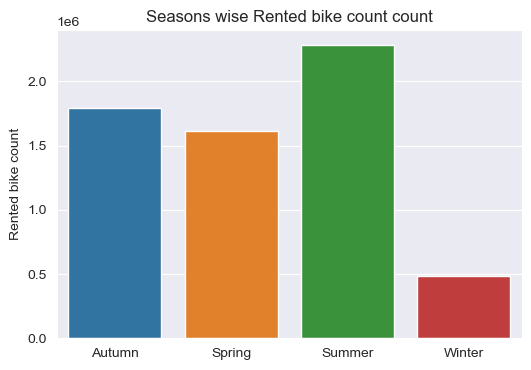

In [617]:
# displaying bar chart to rented bike count season wise
plt.figure(figsize=(6,4))
x = ['Autumn','Spring','Summer','Winter']
y = df.groupby('Seasons')['Rented Bike Count'].sum().values.tolist()

sns.barplot(data=df,x=x,y=y)
plt.title('Seasons wise Rented bike count count')
plt.ylabel('Rented bike count')
plt.show()

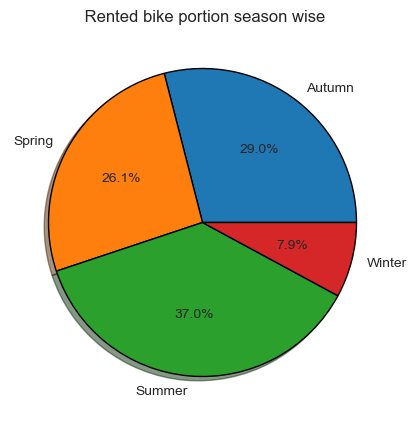

In [618]:
# displaying pie Rented bike count season wise
plt.figure(figsize=(8,5))

slices = df.groupby('Seasons')['Rented Bike Count'].sum().values.tolist()
labels = ['Autumn','Spring','Summer','Winter']

plt.pie(slices, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'black'})
plt.title(' Rented bike portion season wise')
plt.show()

*~ Observations:*
- Summer: Peak season, 37.0% rentals due to warm weather and longer days.
- Autumn: Moderate demand, 29.0% rentals despite cooler weather.
- Spring: 26.1% rentals, slightly lower due to variable weather.
- Winter: Lowest demand, 7.9% rentals because of cold weather and shorter days.

#### 2. Holidays

##### Count of Holidays-No Holid respectively:

In [619]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

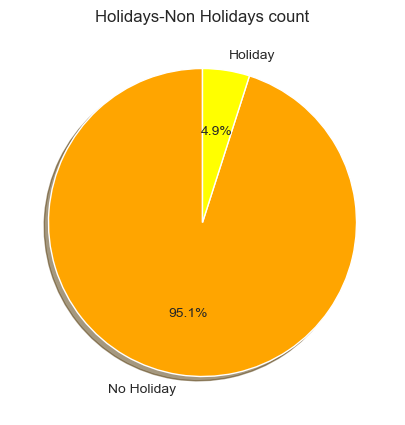

In [620]:
# displaying bar for portion of Holidays-Non Holidays count 
plt.figure(figsize=(8,5))
sns.set_style("dark")

slices = df['Holiday'].value_counts().values.tolist()
labels = df['Holiday'].unique()
colors = ['#FFA500','#FFFF00']

plt.pie(slices, labels=labels, autopct='%1.1f%%', colors = colors, shadow=True, startangle=90)
plt.title('Holidays-Non Holidays count')
plt.show()

##### Count of Reted bike on Holidays-non Holidays respectively:

In [621]:
# Count of rented bike on Holidays and on non Holidays
df.groupby('Holiday')['Rented Bike Count'].sum()

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

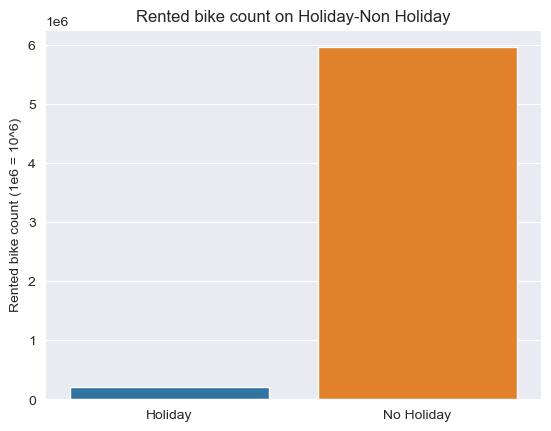

In [622]:
x = df.groupby('Holiday')['Rented Bike Count'].sum().values.tolist()
y = df.groupby('Holiday')['Rented Bike Count'].sum().index.tolist()

sns.set_style("darkgrid")
sns.barplot(data=df,x=y,y=x)
plt.ylabel('Rented bike count (1e6 = 10^6)')
plt.title('Rented bike count on Holiday-Non Holiday')
plt.show()

*~ Observations:*
- Holidays show fewer bike rentals than non-holidays, likely due to people staying home or traveling, reducing bike demand.
- Non-holidays have a high bike rental count nearing 6 million, driven by commuting and recreation needs.

#### 3. Functioning Day

##### Count of Functioning day respectively:

In [623]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

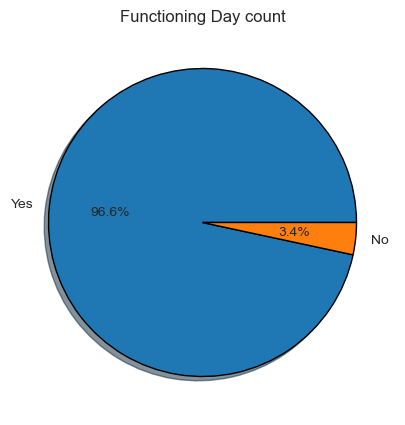

In [624]:
# displaying bar for portion of Functioning day count 
plt.figure(figsize=(8,5))
sns.set_style("dark")

slices = df['Functioning Day'].value_counts().values.tolist()
labels = df['Functioning Day'].unique()

plt.pie(slices, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'black'})
plt.title('Functioning Day count')
plt.show()

##### Count of Reted bike on Functioning day respectively:

In [625]:
# Count of rented bike on Holidays and on non Holidays
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

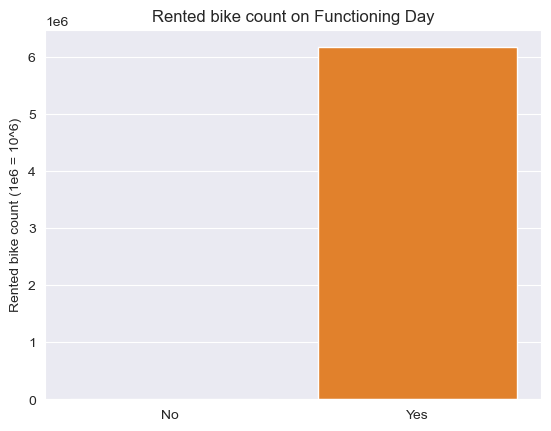

In [626]:
x = df.groupby('Functioning Day')['Rented Bike Count'].sum().values.tolist()
y = df.groupby('Functioning Day')['Rented Bike Count'].sum().index.tolist()

sns.set_style("darkgrid")
sns.barplot(data=df,x=y,y=x)
plt.ylabel('Rented bike count (1e6 = 10^6)')
plt.title('Rented bike count on Functioning Day')
plt.show()

*~ Observations:*
- On non-functioning days, bike rentals are almost zero due to service closures or low demand without work or school commutes.
- On functioning days, rentals hit about 6 million, showing high demand for commuting and free time biking.

#### 4. Month

In [627]:
df['Month'].value_counts()

January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
February     672
Name: Month, dtype: int64

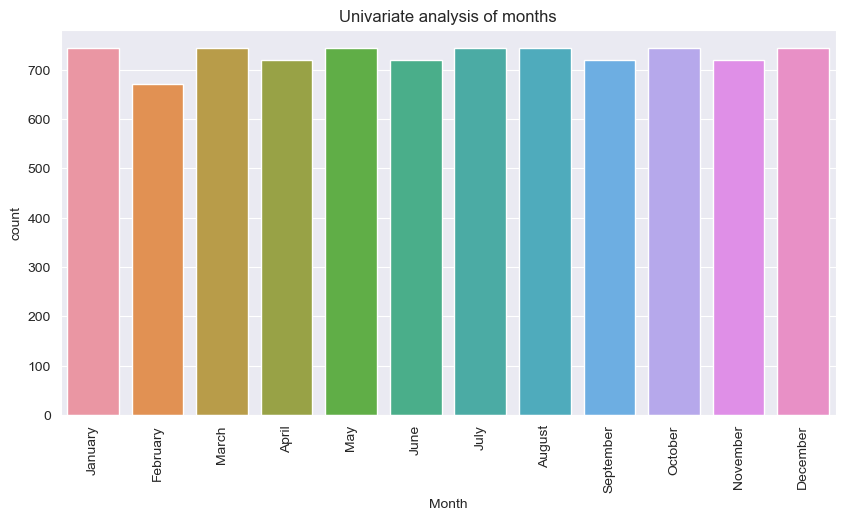

In [628]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))

sns.countplot(data=df,x='Month')

plt.title('Univariate analysis of months')
plt.xticks(rotation=90)
plt.show()

In [629]:
month_df=pd.DataFrame(df.groupby('Month')['Rented Bike Count'].sum().reset_index())

In [630]:
# settting the month  col from month_df sequencially
month_df['Month'] = pd.Categorical(month_df['Month'], categories=
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

month_df = month_df.sort_values('Month')

In [631]:
month_df

,Month,Rented Bike Count
4,January,287244
3,February,264112
7,March,455037
0,April,556219
8,May,665948
6,June,706728
5,July,691339
1,August,614190
11,September,499326
10,October,626988


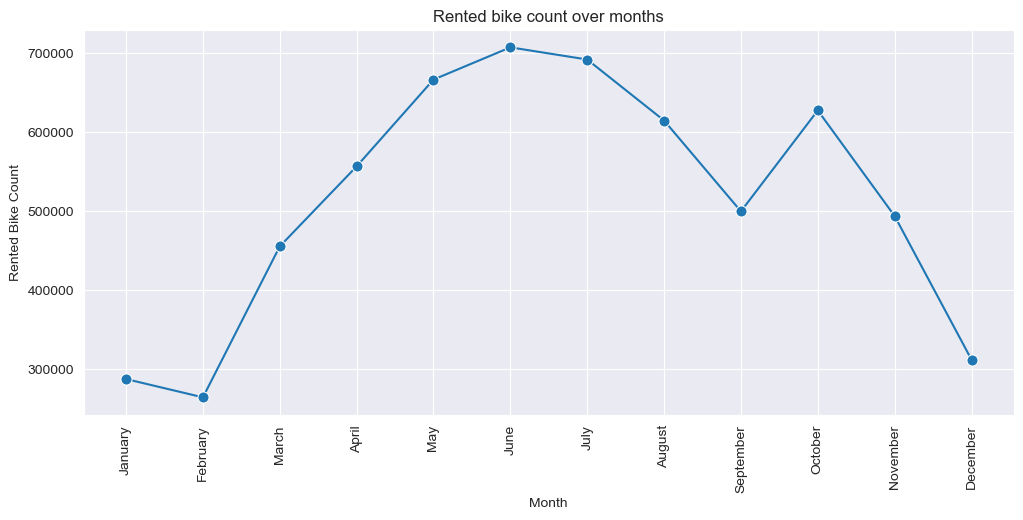

In [632]:
# displaying rented bike count over months
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

sns.lineplot(data=month_df, x='Month', y='Rented Bike Count', marker = 'o',markersize = 8)
plt.title('Rented bike count over months')
plt.xticks(rotation=90)
plt.show()

*~ Observations:*
- Significant increase in bike rentals from January to July, attributed to warmer weather and longer daylight hours.
- Peak in July with over 700,000 rentals, indicating July as the most popular month for bike rentals.
- Steady decline in rentals from August to December, possibly due to colder weather and shorter days deterring people from biking.
- Lowest count in January, slightly above 300,000 rentals, likely affected by the cold weather reducing demand for bike rentals.

#### 5. Hours

In [633]:
hours_df = df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
hours_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


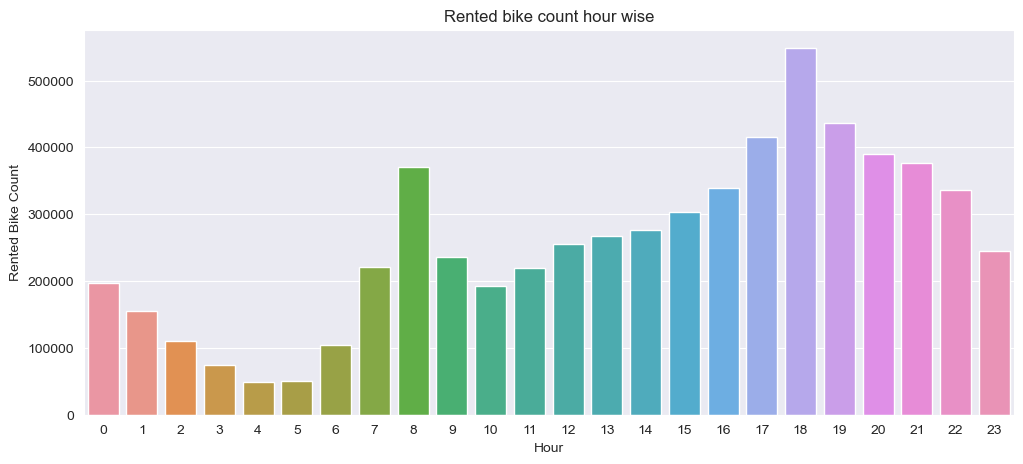

In [634]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

sns.barplot(data=hours_df,x='Hour',y='Rented Bike Count')
plt.title('Rented bike count hour wise')
plt.show()

*~ Observation:*
- The chart shows when people rent bikes the most. Fewer rentals happen early (0-5 AM), maybe because fewer people are out.
- More bikes are rented from 6 to 8 AM, probably when people go to work or school. After that, rentals stay steady during the day.
- At 5-6 PM, more bikes get rented again, probably when people come back from work or school. Evenings also have lots of rentals, with a smaller peak at 7 PM, maybe because people use bikes for fun then.

#### 6. Year

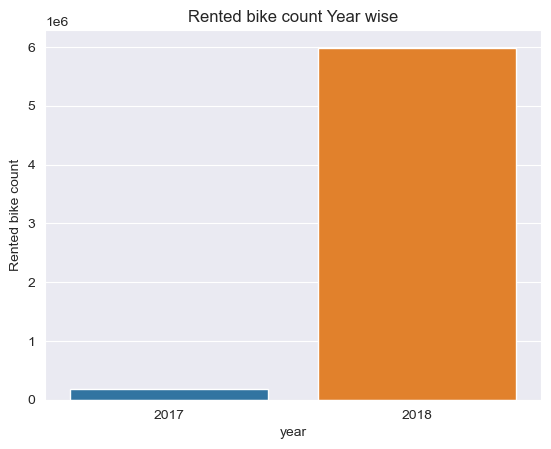

In [635]:
x = df.groupby('Year')["Rented Bike Count"].sum().index.tolist()
y = df.groupby('Year')["Rented Bike Count"].sum().values.tolist()

data = {'year': x, 'Rented Bike count':y}
year_df = pd.DataFrame(data)

sns.set_style("darkgrid")
sns.barplot(data=year_df, x='year', y='Rented Bike count')
plt.ylabel('Rented bike count')
plt.title('Rented bike count Year wise')
plt.show()

#### Analysis of Hours with Functioning day, Holiday-non Holiday, Season

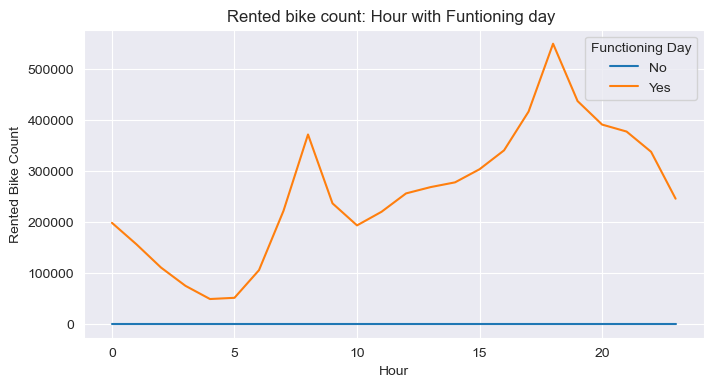

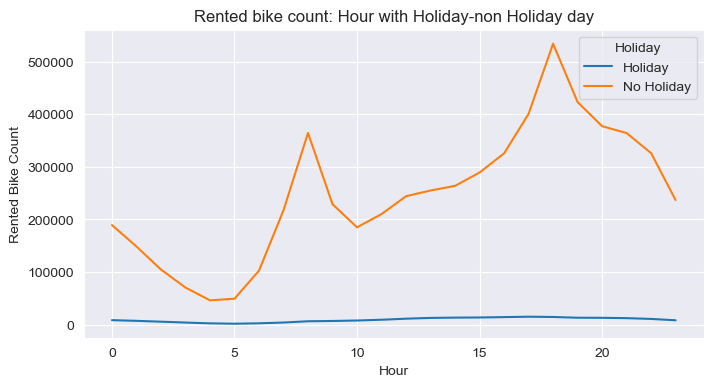

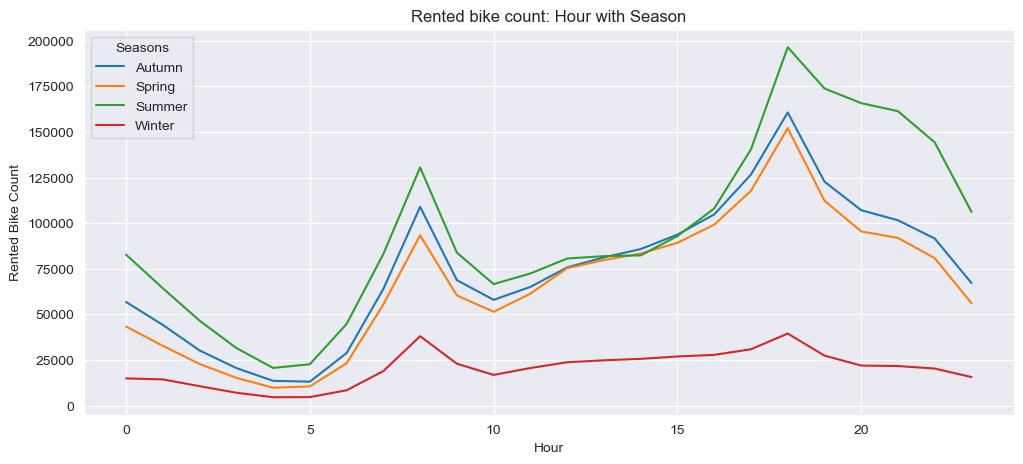

In [636]:
# Hour with Funtioning day
df_1 = df.groupby(['Hour','Functioning Day'])['Rented Bike Count'].sum().reset_index()

# Hour with Holiday-non Holiday day
df_2 = df.groupby(['Hour','Holiday'])['Rented Bike Count'].sum().reset_index()

# Hour with Season
df_3 = df.groupby(['Hour','Seasons'])['Rented Bike Count'].sum().reset_index()

sns.set_style("darkgrid")
plt.figure(figsize=(8,4))

sns.lineplot(data=df_1, x='Hour',y='Rented Bike Count',hue='Functioning Day')
plt.title('Rented bike count: Hour with Funtioning day ')
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(data=df_2, x='Hour',y='Rented Bike Count',hue='Holiday')
plt.title('Rented bike count: Hour with Holiday-non Holiday day')
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_3, x='Hour',y='Rented Bike Count',hue='Seasons')
plt.title('Rented bike count: Hour with Season')
plt.show()


plt.show()

#### Distribution of numeric features

*~ Weather Factors from the dataset can be affecting for bike renting :* 
- Temperature, Humidity, Wind Speed, Visibility, Dew Point Temperature, Solar Radiation, Rainfall, Snowfall.  

*~ Before analysis will introduce there impact theoretically:*
- *Temperature*: Moderate temperatures around 20-25°C tend to boost bike rentals. Extreme temperatures, either too hot or too cold, might deter riders, but preferences vary based on climate and culture.

- *Humidity*: High humidity, especially in combination with high temperatures, can make biking uncomfortable. Lower humidity levels are more favorable, but the impact varies with local climate.

- *Wind Speed*: High winds can discourage biking due to the challenge they pose. Moderate to light winds are preferable for biking.

- *Visibility*: Poor visibility caused by fog, heavy rain, or weather conditions affects safety and can reduce bike rentals. Clear visibility is better for biking.

- *Dew Point Temperature*: High dew points can feel muggy and uncomfortable, potentially reducing bike rentals. Lower dew points are more favorable.

- *Solar Radiation*: Extreme heat from intense sunlight might deter riders, but moderate sunlight can encourage outdoor activities, making it preferable.

- *Rainfall*: Heavy or continuous rain tends to decrease bike rentals significantly. Dry days or light drizzles have less impact.

- *Snowfall*: In areas with snow, bike rentals are greatly reduced or stopped due to safety and practicality concerns.

*~ Values that might positively impact bike rentals:*

- Moderate temperatures around 20-25°C.
- Lower humidity levels.
- Moderate wind speeds.
- Good visibility.
- Moderate solar radiation that's not excessively hot.
- Values that might negatively impact bike rentals:

*~ Extreme temperatures (very high or very low):*
- High humidity or dew point.
- Heavy rainfall or snowfall.
- Poor visibility due to weather conditions.






In [637]:
weather_factors = ['Temperature', 'Humidity', 'wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation ', 'Rainfall', 'Snowfall ']

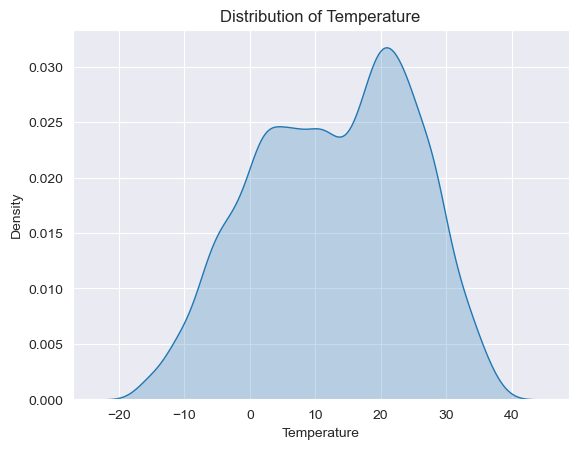

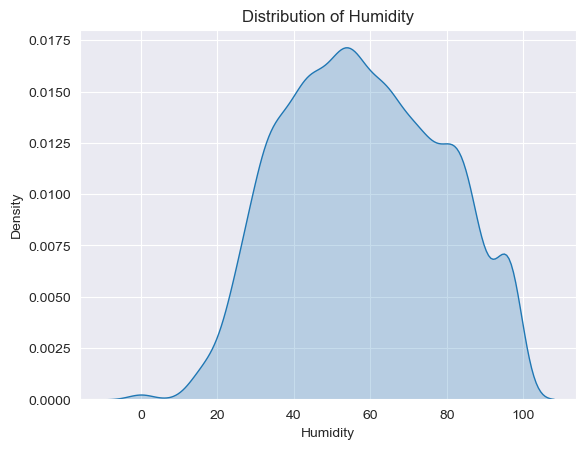

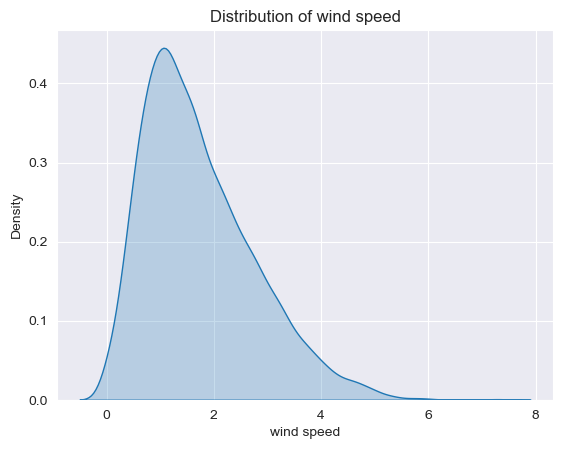

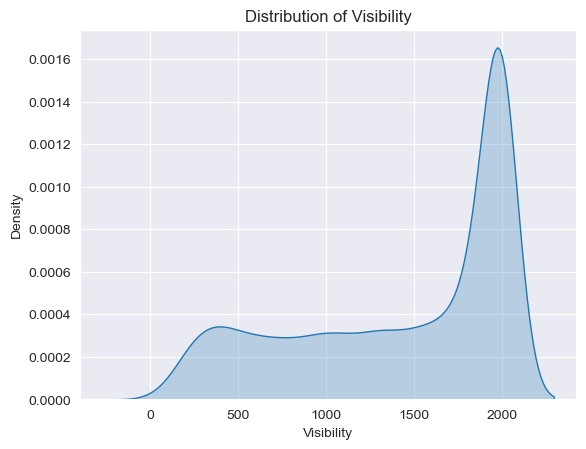

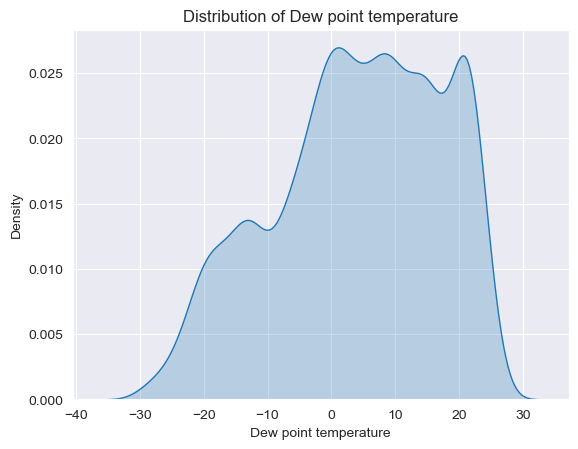

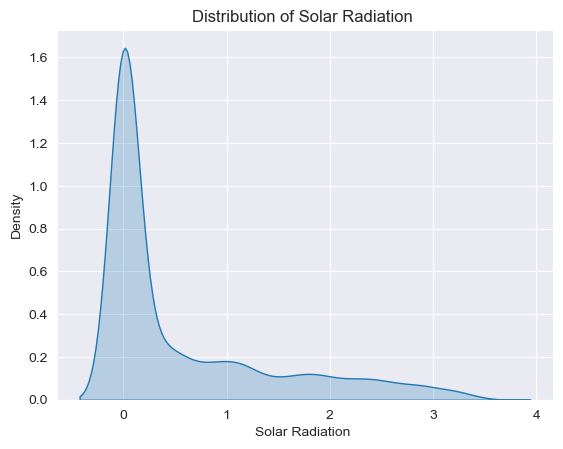

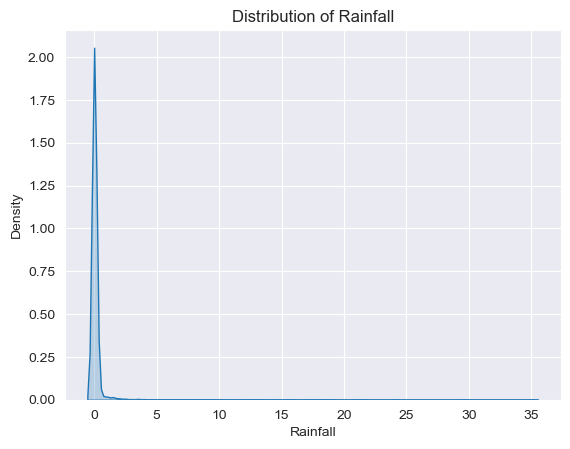

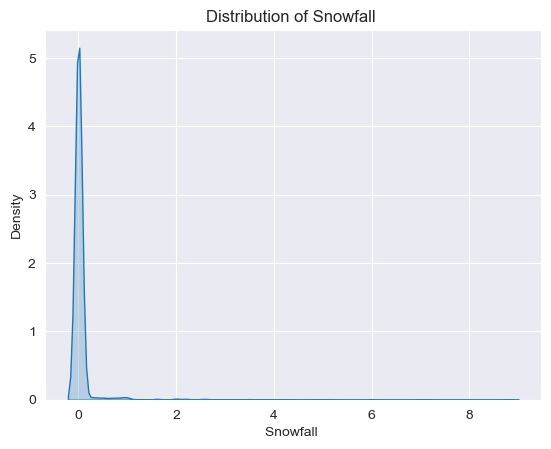

In [638]:
# Plot the distribution curves
for col in weather_factors:
    sns.kdeplot(df[col], shade=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of {}'.format(col))
    plt.show()

#### Exploring the weather factor features with rented bike

##### 1. Tempreature vs Rented bike count

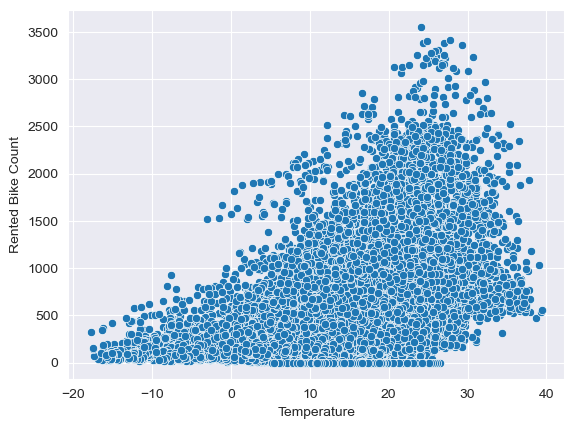

In [639]:
sns.scatterplot(data=df, x='Temperature', y='Rented Bike Count')
plt.show()

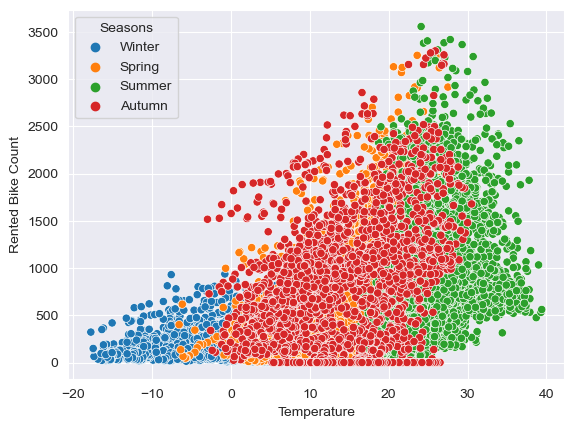

In [640]:
# Season wise
sns.scatterplot(data=df, x='Temperature', y='Rented Bike Count',hue='Seasons')
plt.show()

##### 2. Humidity vs Rented bike count

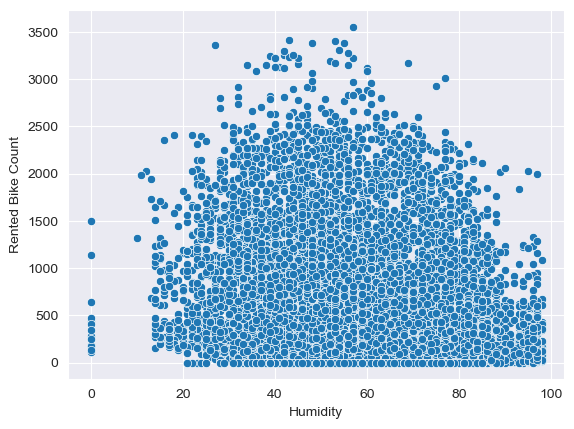

In [641]:
sns.scatterplot(data=df, x='Humidity', y='Rented Bike Count')
plt.show()

##### 3. Wind speed vs Rented bike count

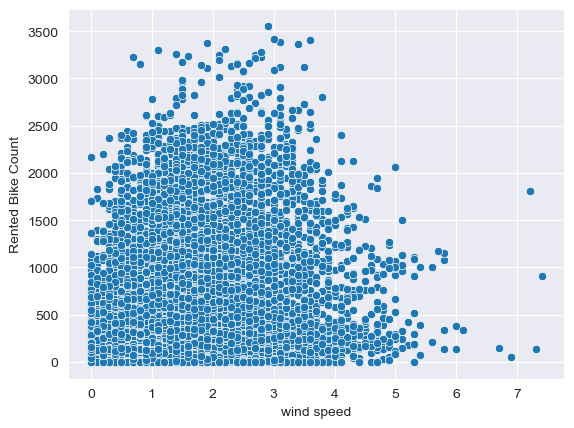

In [642]:
sns.scatterplot(data=df, x='wind speed', y='Rented Bike Count')
plt.show()

##### 4. Visibility vs Rented bike count

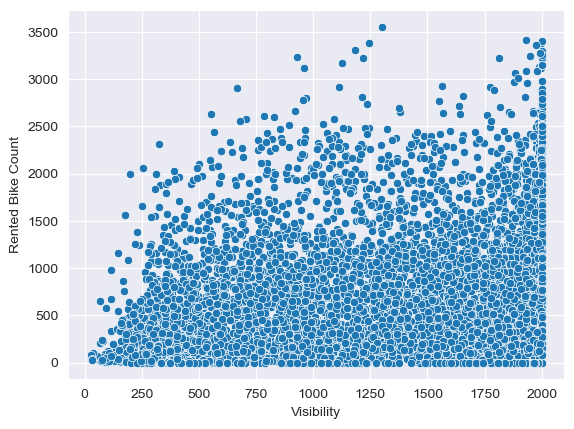

In [643]:
sns.scatterplot(data=df, x='Visibility', y='Rented Bike Count')
plt.show()

##### 5. Dew point tempreature vs Rented bike count

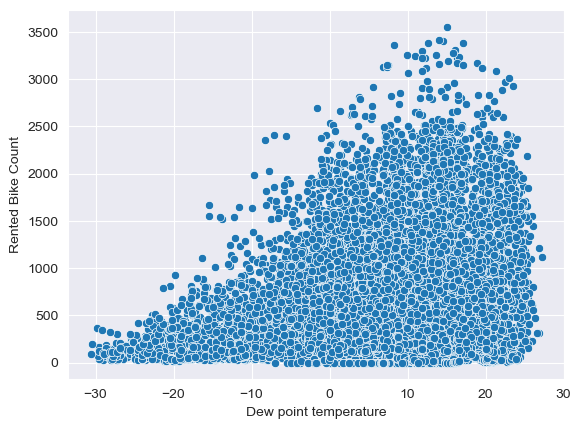

In [644]:
sns.scatterplot(data=df, x='Dew point temperature', y='Rented Bike Count')
plt.show()

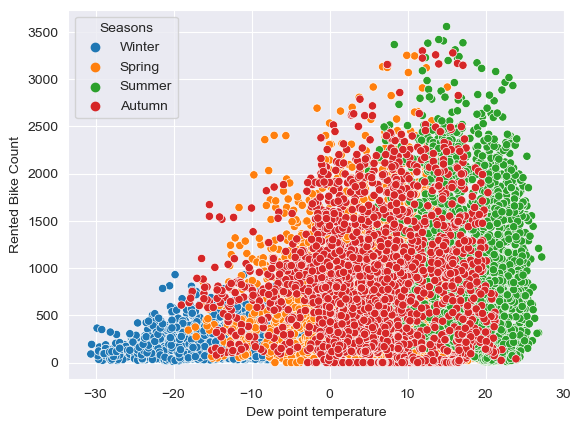

In [645]:
# Season wise
sns.scatterplot(data=df, x='Dew point temperature', y='Rented Bike Count',hue='Seasons')
plt.show()

##### 6. Solar radiation vs Rented bike count

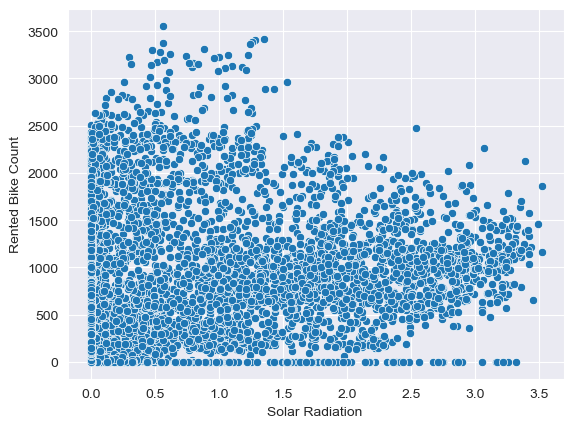

In [646]:
sns.scatterplot(data=df, x='Solar Radiation ', y='Rented Bike Count')
plt.show()

##### 7. Rainfall vs Rented bike count

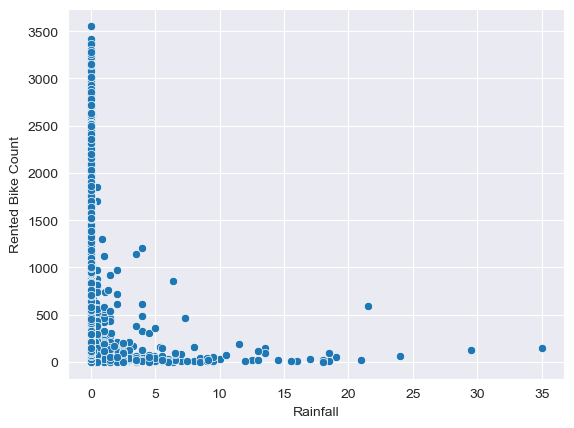

In [647]:
sns.scatterplot(data=df, x='Rainfall', y='Rented Bike Count')
plt.show()

##### 8. Snowfall vs Rented bike count

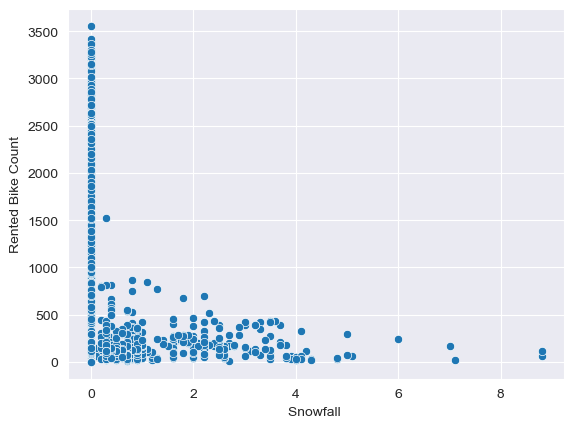

In [648]:
sns.scatterplot(data=df, x='Snowfall ', y='Rented Bike Count')
plt.show()

#### Correlation Heatmap

In [649]:
corr_ = df.corr()

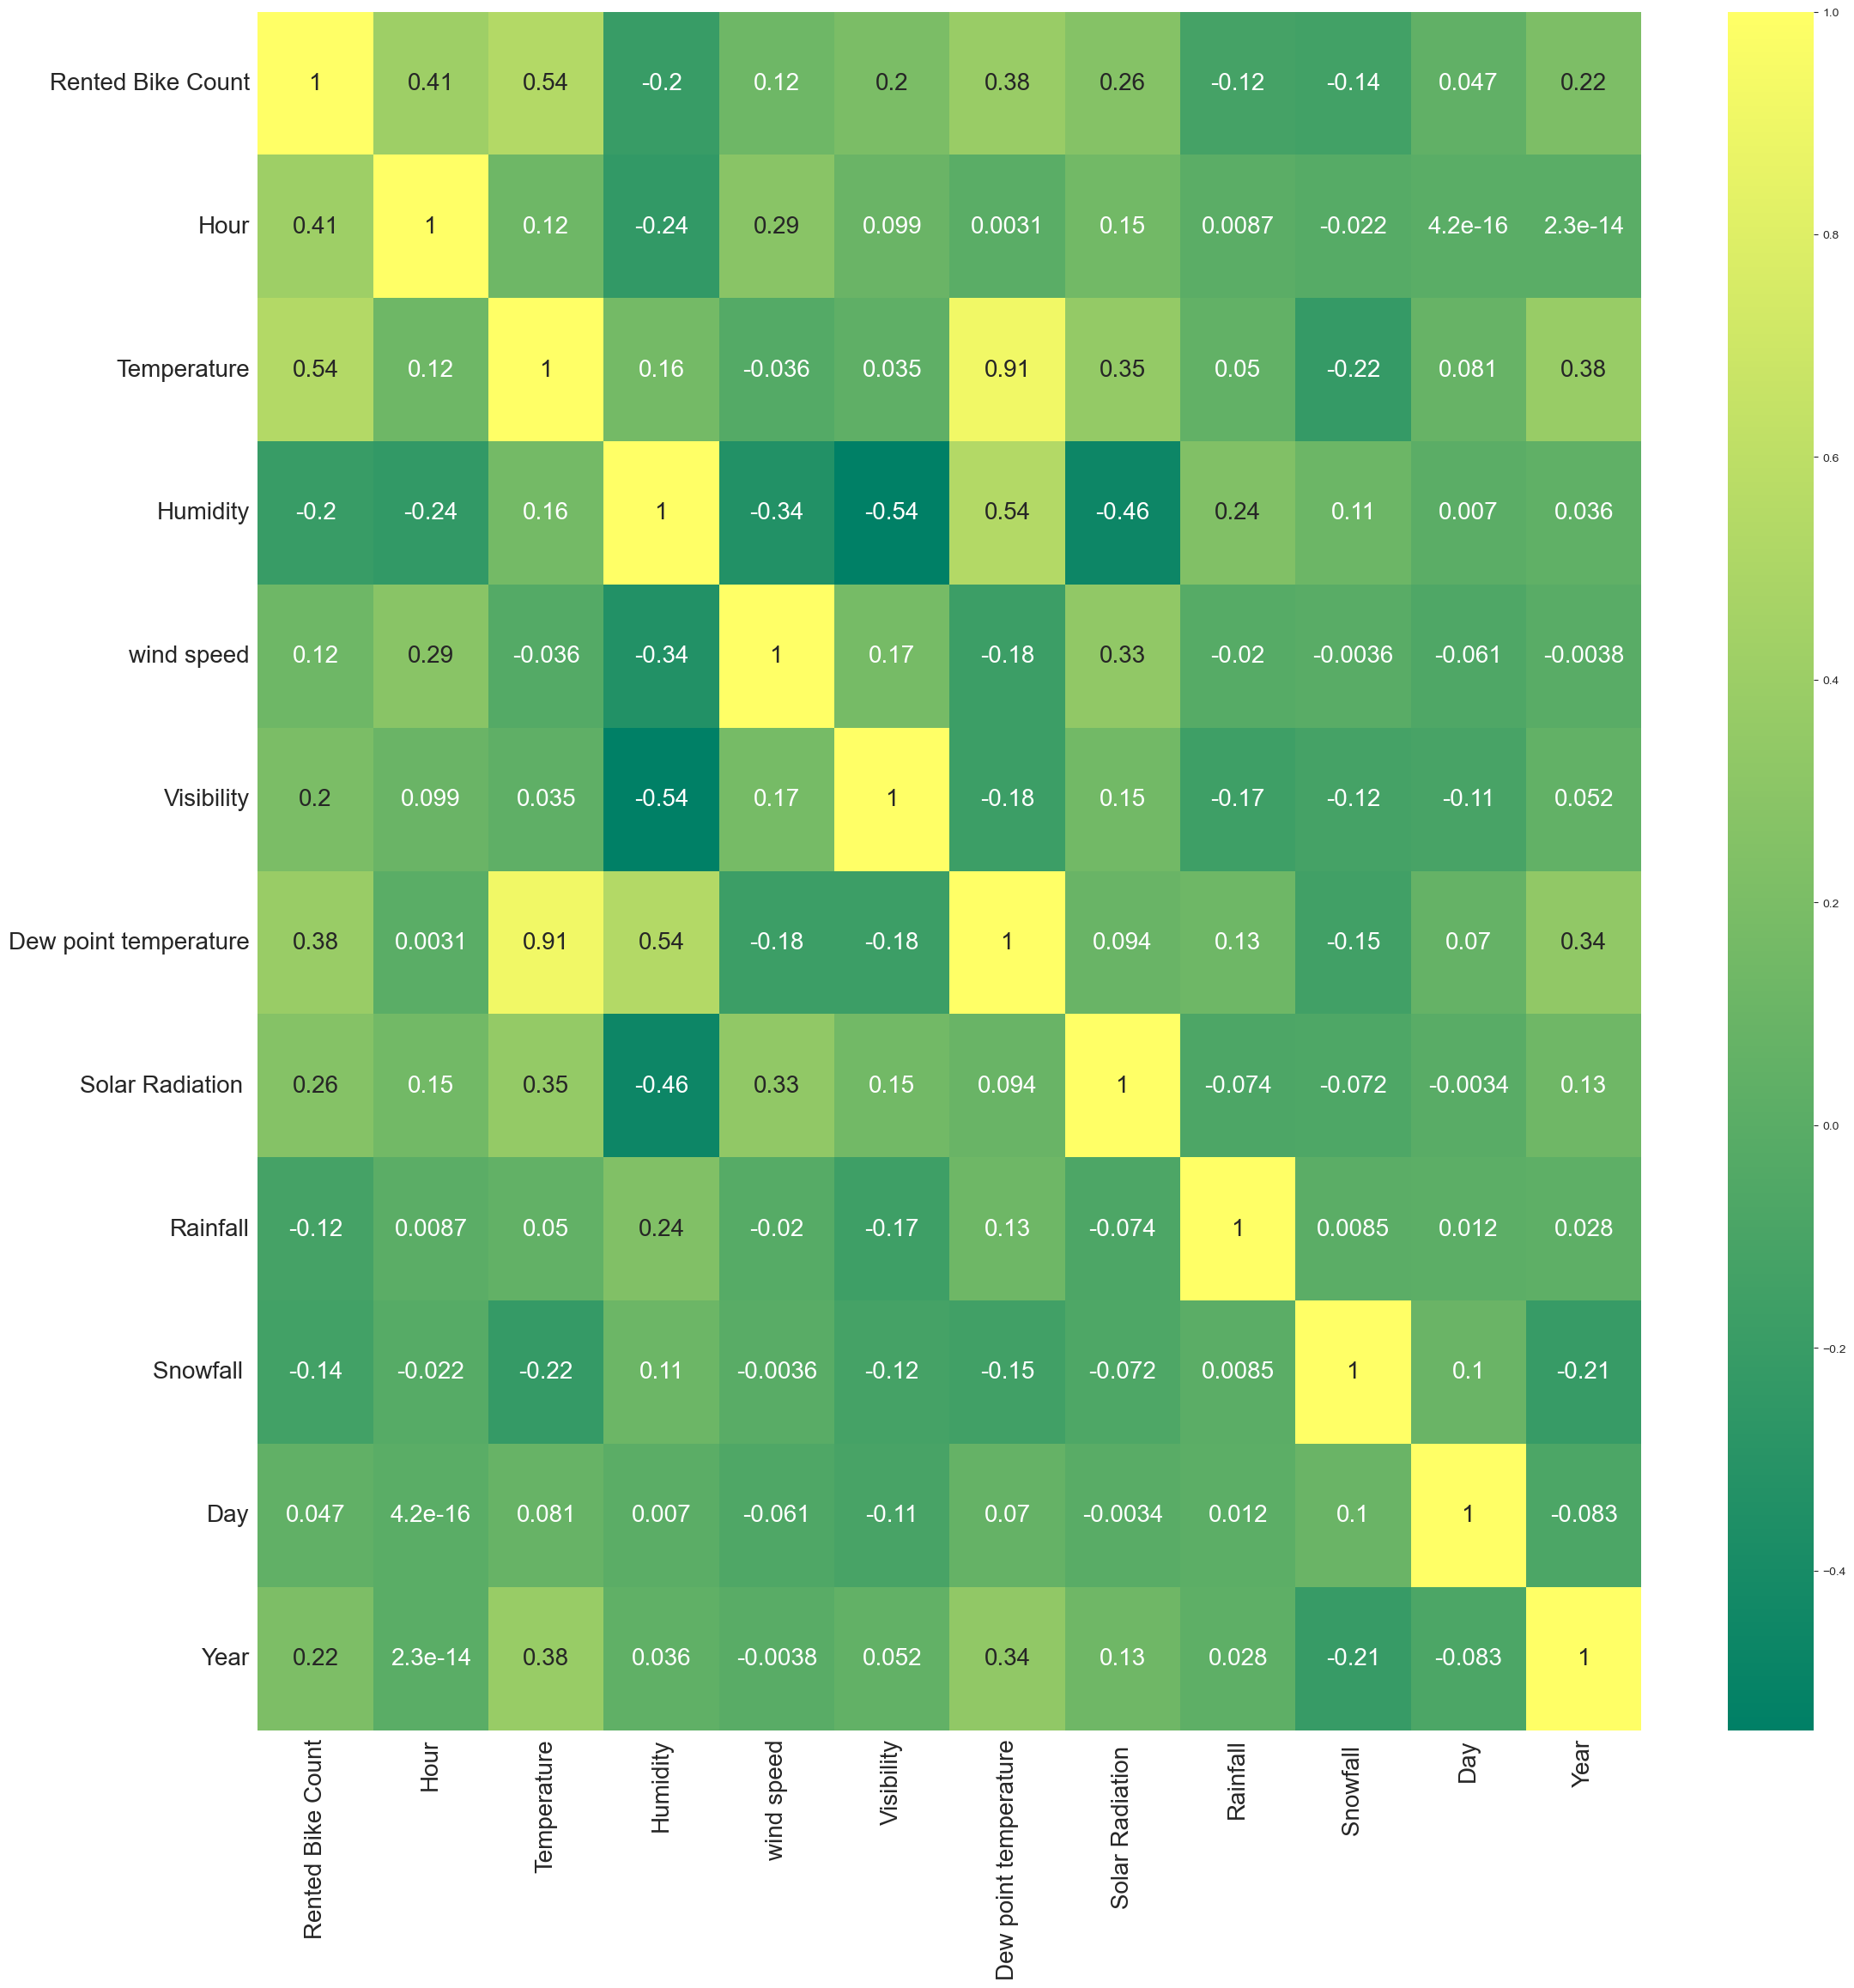

In [650]:
plt.figure(figsize=(26,26))
sns.heatmap(corr_,annot=True,annot_kws={"fontsize":20},cmap='summer')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.show()

*~ Observations:*

- Rented Bike Count: It's strongly linked to temperature (0.54) and hour (0.41)—higher values mean more rentals. Conversely, humidity (-0.2) and rainfall (-0.12) show that as they rise, bike rentals tend to drop.

- Temperature: A solid positive correlation (0.54) means hotter weather relates to more rented bikes.

- Hour: Shows a positive link (0.41) to bike rentals during specific times of the day.

- Humidity: Has a negative correlation (-0.2), implying higher humidity might lower bike rentals.

- Rainfall: Also negatively correlated (-0.12), suggesting rain could decrease bike rentals.

- Other factors like Wind Speed, Visibility, Dew Point Temperature, Solar Radiation, Snowfall, Year, Month, and Day also matter, but their impact on bike rentals is weaker.

#### Checking for Null and Duplicate values

In [651]:
df.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Day                      0
Month                    0
Year                     0
dtype: int64

*~ There are no missing values.*

In [652]:
df.duplicated().sum()

0

*~ There are no Duplicate values.*

### Handling outliers

<Axes: xlabel='Rented Bike Count'>

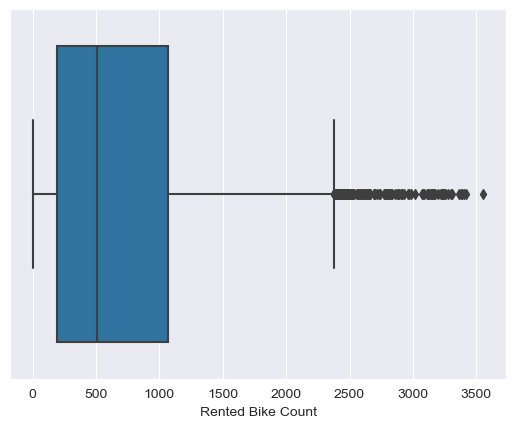

In [653]:
# checking for outliers in Rented bike count
sns.boxplot(data=df,x='Rented Bike Count')

*~ Rented bike count columns seem right skewed*

In [654]:
# Treating it.
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count'>

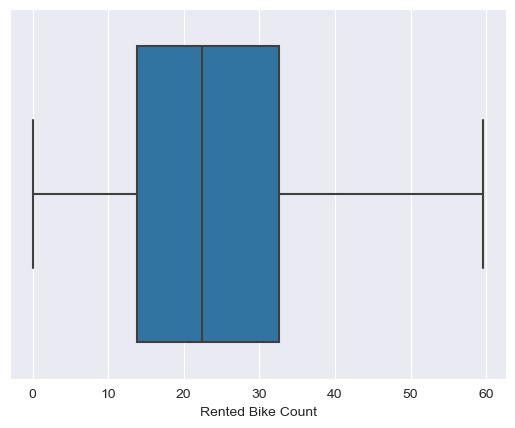

In [655]:
# checking for outliers in Rented bike count
sns.boxplot(data=df,x='Rented Bike Count')

### Feature scaling 

In [656]:
# Feature to be scaled: Wind speed,Solar Radiation,Rainfall,Snowfall

In [657]:
features_to_scale = [ 'wind speed','Solar Radiation ','Rainfall', 'Snowfall ']

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler on the selected features
scaler.fit(df[features_to_scale])

# transform the selected features using the fitted scaler
df[features_to_scale] = scaler.transform(df[features_to_scale])

In [658]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,15.937377,0,-5.2,37,0.297297,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
1,14.282857,1,-5.5,38,0.108108,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
2,13.152946,2,-6.0,39,0.135135,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
3,10.344080,3,-6.2,40,0.121622,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017
4,8.831761,4,-6.0,36,0.310811,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,2017


### Handling categorical value

In [659]:
# droping the year & day columns
df.drop(columns=['Year','Day'],inplace = True)

In [660]:
# Mapping columns to 1 and 0 
columns_to_convert = ['Holiday', 'Functioning Day']

for col in columns_to_convert:
    if col == 'Holiday':
        df[col] = df[col].map({'Holiday': 1, 'No Holiday': 0})
    else:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [682]:
# performing the OHE on dataset
new_df = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Hour','Seasons','Month']

for col in cols:
    new_df = one_hot_encoding(new_df, col)
    
new_df.head()

,Rented Bike Count,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,15.937377,-5.2,37,0.297297,2000,-17.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,14.282857,-5.5,38,0.108108,2000,-17.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
2,13.152946,-6.0,39,0.135135,2000,-17.7,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3,10.344080,-6.2,40,0.121622,2000,-17.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,8.831761,-6.0,36,0.310811,2000,-18.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0


In [683]:
new_df.columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation ', 'Rainfall',
       'Snowfall ', 'Holiday', 'Functioning Day', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'],
      dtype='object')

### Train Test Split 

In [684]:
# Splitting the data into Dependent and Independent variable

X=new_df.drop(['Rented Bike Count'],axis=1)
y=new_df['Rented Bike Count']

In [685]:
X.shape

(8760, 47)

In [686]:
y.shape

(8760,)

##### Train test split

In [687]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [688]:
print(f'Shape of the X training dataset: {X_train.shape}')
print(f'Shape of the X testing dataset: {X_test.shape}')
print(f'Shape of the y training dataset: {y_train.shape}')
print(f'Shape of the y testing dataset: {y_test.shape}')

Shape of the X training dataset: (7008, 47)
Shape of the X testing dataset: (1752, 47)
Shape of the y training dataset: (7008,)
Shape of the y testing dataset: (1752,)


### Model building

*~ Model:*
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Xgboost Regressor

In [689]:
# define function to evaluate the models

def evaluate_model(model):
    # Training predictions
    y_train_pred = model.predict(X_train)
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics   
    train_metrics = {
        'MSE_train': mean_squared_error(y_train, y_train_pred),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'R2_train': r2_score(y_train, y_train_pred),
        'Adjusted_R2_train': 1 - (1 - r2_score(y_train, y_train_pred)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    }
    
    print("Training Metrics:")
    for metric_name, metric_value in train_metrics.items():
        print(f"{metric_name}: {metric_value}")
    
    
    test_metrics = {
        'MSE_test': mean_squared_error(y_test, y_test_pred),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2_test': r2_score(y_test, y_test_pred),
        'Adjusted_R2_test': 1 - (1 - r2_score(y_test, y_test_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    }
    
    print("\nTesting Metrics:")
    for metric_name, metric_value in test_metrics.items():
        print(f"{metric_name}: {metric_value}")
    
    
    # Visualize predicted vs actual values
    plt.figure(figsize=(12, 6))

    # Training data plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Training Data')

    # Testing data plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Testing Data')

    plt.tight_layout()
    plt.show()
    
    
    return metrics

##### Linear Regression

Training Metrics:
MSE_train: 37.0311260552138
RMSE_train: 6.08532053841158
R2_train: 0.7603855187296256
Adjusted_R2_train: 0.7587674324336906

Testing Metrics:
MSE_test: 37.88259339915011
RMSE_test: 6.154883703137705
R2_test: 0.7584668027178506
Adjusted_R2_test: 0.7518047955158195


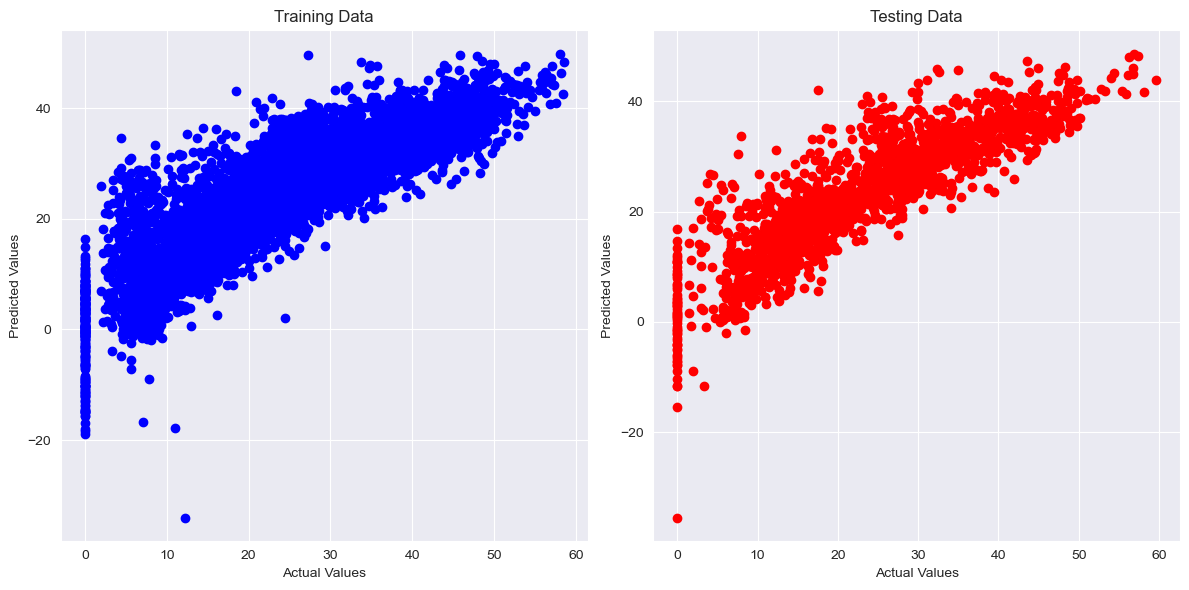

<module 'sklearn.metrics' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [690]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# evaluating the model
evaluate_model(lr)

*~ Observations:*

- Mean Squared Error (MSE):
   Both training (52.29) and testing (50.91) MSEs are close. This similarity implies the model performs consistently on seen and unseen data, indicating no significant overfitting.

- Root Mean Squared Error (RMSE):
   The RMSE values are comparable for training (7.23) and testing (7.14) sets. Similar RMSEs suggest good generalization with minimal prediction errors.

- R-Squared (R2):
   R2 scores for training (0.66) and testing (0.68) indicate your model explains around 66-68% of the variance in the target variable. This suggests a reasonable fit to the data.

- Adjusted R-Squared:
   Adjusted R2 values for training (0.66) and testing (0.67) reflect model fit while considering the number of predictors. Close values signify a balanced model complexity that generalizes effectively to new data.

##### Decision Tree Regressor

In [691]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

Training Metrics:
MSE_train: 53.77639409282423
RMSE_train: 7.333238990570553
R2_train: 0.6520331907830528
Adjusted_R2_train: 0.6496834149162143

Testing Metrics:
MSE_test: 65.82158852701649
RMSE_test: 8.113050506869564
R2_test: 0.5803323558234266
Adjusted_R2_test: 0.5687570158725468


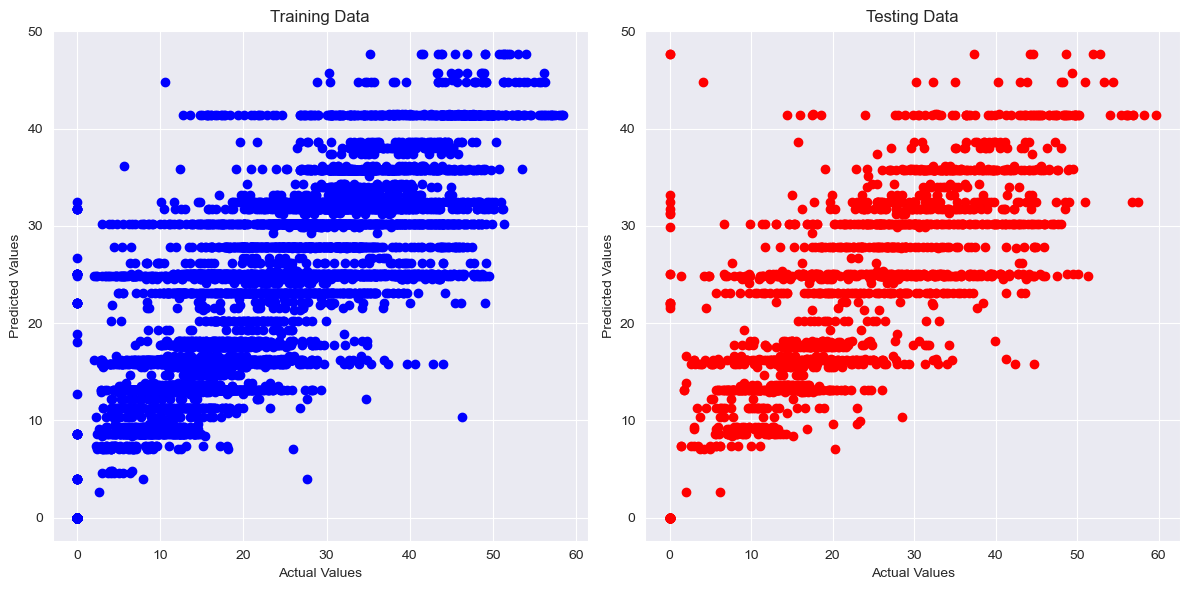

<module 'sklearn.metrics' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [692]:
# evaluating the model
evaluate_model(decision_regressor)

*~ Observations:*
- Mean Squared Error (MSE): The training set MSE is 26.20, while the testing set MSE is 32.46. A higher testing set MSE suggests slightly poorer performance on unseen data.

- Root Mean Squared Error (RMSE): In the training set, RMSE is 5.12; in the testing set, it's 5.70. A higher testing set RMSE indicates less accuracy in predictions for unseen data.

- R-Squared (R2): The training set R2 is 0.83, meaning 83% of the output variation is explained by input variables. The testing set R2 is 0.79, indicating 79% variation explanation. These high scores suggest a good fit of the model to the data.

- Adjusted R-Squared: Both the training and testing set's Adjusted R2 are 0.83 and 0.79, respectively. These values closely match the R2 scores, implying an optimal number of features without significant complexity penalization.

##### Random Forest Regressor

In [672]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

Training Metrics:
MSE_train: 2.0839626900343213
RMSE_train: 1.4435936720678437
R2_train: 0.9865154616628494
Adjusted_R2_train: 0.9864671784405021

Testing Metrics:
MSE_test: 15.000691567988756
RMSE_test: 3.8730726262218163
R2_test: 0.9043580528480664
Adjusted_R2_test: 0.9029727407514276


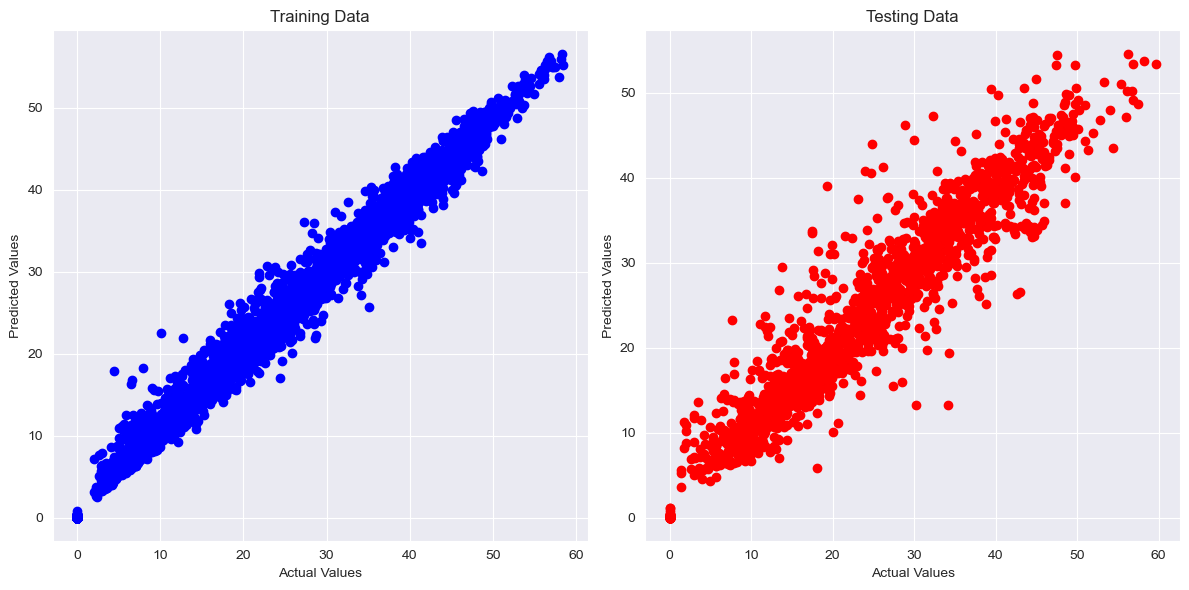

<module 'sklearn.metrics' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [673]:
# evaluating the model
evaluate_model(rf_model)

In [674]:
# random forest important feature selection
rf_model.feature_importances_

array([0.23895621, 0.26813132, 0.11994241, 0.01345958, 0.01326303,
       0.02256093, 0.03789442, 0.04862359, 0.00200457, 0.00286737,
       0.15517812, 0.00846172, 0.00177874, 0.05217932, 0.00143731,
       0.00064982, 0.00070201, 0.00117479, 0.00091487, 0.00129002,
       0.0033657 , 0.00131353, 0.00076529, 0.0013781 , 0.00170722])

In [675]:
importance_rf = rf_model.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame for feature importance
importance_rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Feature Importance': importance_rf
})

# Sorting the DataFrame by feature importance in descending order
importance_rf_df = importance_rf_df.sort_values(by='Feature Importance', ascending=False)

# Rounding the feature importance values for better readability
importance_rf_df['Feature Importance'] = importance_rf_df['Feature Importance'].round(2)

importance_rf_df

,Feature,Feature Importance
1,Temperature,0.27
0,Hour,0.24
10,Functioning Day,0.16
2,Humidity,0.12
13,Seasons_Winter,0.05
7,Rainfall,0.05
6,Solar Radiation,0.04
5,Dew point temperature,0.02
3,wind speed,0.01
4,Visibility,0.01


**Performing Hyperparameter Tunning For Random forest**

In [710]:
# Define the hyperparameters to be tuned
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [4, 6, 8],
              'min_samples_split': [2, 5, 10]}

# Perform hyperparameter tuning using GridSearchCV
rf_grid = GridSearchCV(rf_model, param_grid, cv=5)
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters: ", rf_grid.best_params_)

Best hyperparameters:  {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}


In [711]:
rf_optimal_model = rf_grid.best_estimator_

Training Metrics:
MSE_train: 29.73031087626039
RMSE_train: 5.452550859575763
R2_train: 0.8076263463336107
Adjusted_R2_train: 0.8063272713735072

Testing Metrics:
MSE_test: 32.452884114681915
RMSE_test: 5.696743290221345
R2_test: 0.7930857378570588
Adjusted_R2_test: 0.7873785956500645


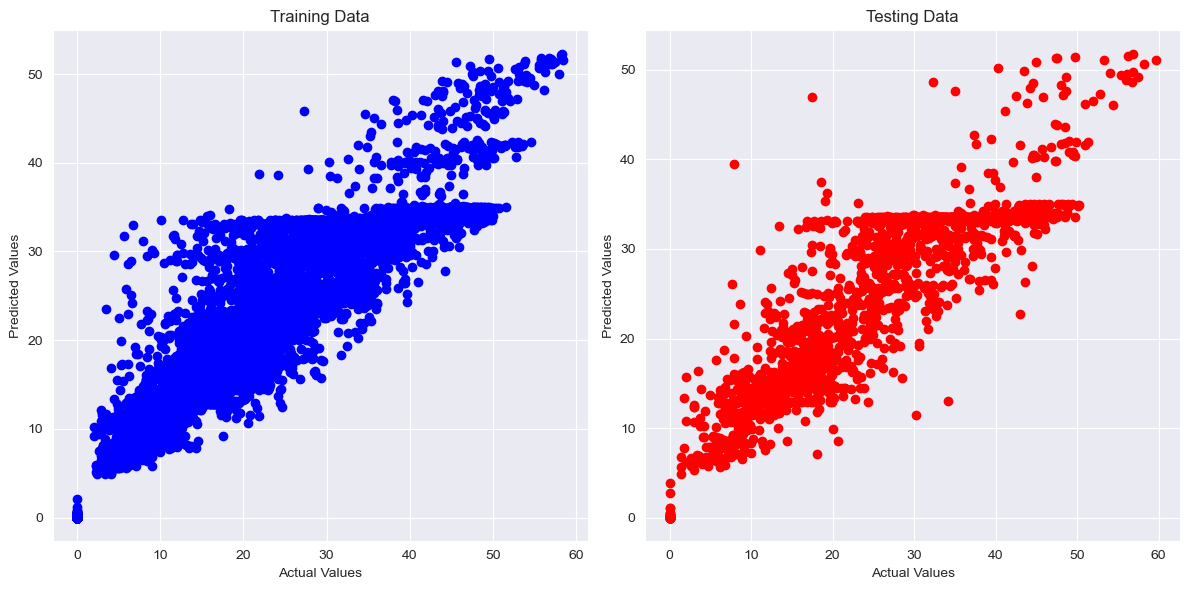

<module 'sklearn.metrics' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [712]:
# evaluating the model
evaluate_model(rf_optimal_model)

##### Xgboost Regressor

In [713]:
xg_model = XGBRegressor()
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Training Metrics:
MSE_train: 4.102423538996498
RMSE_train: 2.025444035019605
R2_train: 0.9734547610898369
Adjusted_R2_train: 0.9732755044477711

Testing Metrics:
MSE_test: 17.845264921391337
RMSE_test: 4.2243656235453075
R2_test: 0.8862215200687044
Adjusted_R2_test: 0.8830832638734163


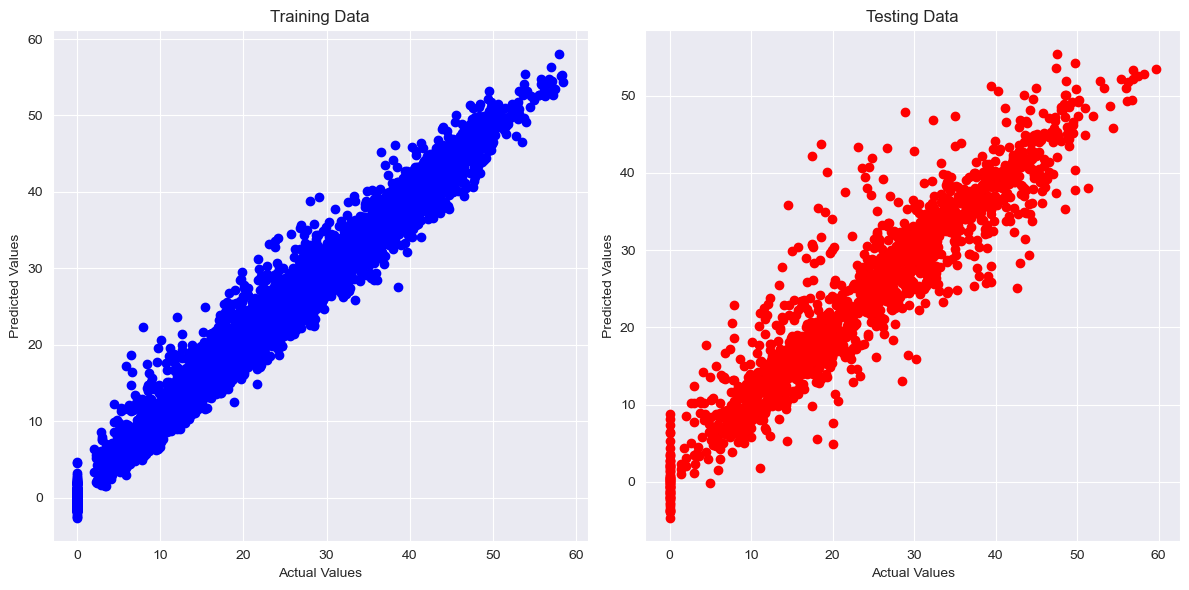

<module 'sklearn.metrics' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [695]:
# evaluating the model
evaluate_model(xg_model)

In [696]:
xg_model.feature_importances_

array([0.02199908, 0.01832298, 0.00136096, 0.00135538, 0.00382781,
       0.00631908, 0.02740943, 0.00173119, 0.00433421, 0.20738415,
       0.0051594 , 0.03012378, 0.03811418, 0.06863082, 0.06809611,
       0.02860347, 0.00215386, 0.01403748, 0.00168414, 0.01728112,
       0.00812537, 0.0013325 , 0.00177442, 0.00081917, 0.00133688,
       0.00474667, 0.04412512, 0.07620461, 0.05221544, 0.04846283,
       0.04635156, 0.03811124, 0.00684724, 0.00394752, 0.00222552,
       0.067178  , 0.00174707, 0.00108564, 0.00057515, 0.0024889 ,
       0.00137728, 0.00343518, 0.00297566, 0.00196043, 0.00459829,
       0.00631906, 0.00170464], dtype=float32)

In [698]:
importance_xg = xg_model.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame for feature importance
importance_xg_df = pd.DataFrame({
    'Feature': feature_names,
    'Feature Importance': importance_xg
})

# Sorting the DataFrame by feature importance in descending order
importance_xg_df = importance_xg_df.sort_values(by='Feature Importance', ascending=False)

# Rounding the feature importance values for better readability
importance_xg_df['Feature Importance'] = importance_xg_df['Feature Importance'].round(2)

importance_xg_df

,Feature,Feature Importance
9,Functioning Day,0.21
27,Hour_18,0.08
13,Hour_4,0.07
14,Hour_5,0.07
35,Seasons_Winter,0.07
28,Hour_19,0.05
29,Hour_20,0.05
30,Hour_21,0.05
26,Hour_17,0.04
12,Hour_3,0.04


**Performing Hyperparameter Tunning For Xgboost**

In [714]:
# Define the hyperparameters to be tuned
param_grid = {'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [3, 4, 5],
              'n_estimators': [100, 150, 200]}

# Perform hyperparameter tuning using GridSearchCV
xgb_grid = GridSearchCV(xg_model, param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...one,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]})

In [717]:
# Get the best hyperparameters
print("Best hyperparameters: ", xgb_grid.best_params_)

Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}


Training Metrics:
MSE_train: 8.734978453089495
RMSE_train: 2.955499696005651
R2_train: 0.943479241548739
Adjusted_R2_train: 0.9430975640132204

Testing Metrics:
MSE_test: 18.20474987350957
RMSE_test: 4.266702458985108
R2_test: 0.8839295030215851
Adjusted_R2_test: 0.8807280280462415


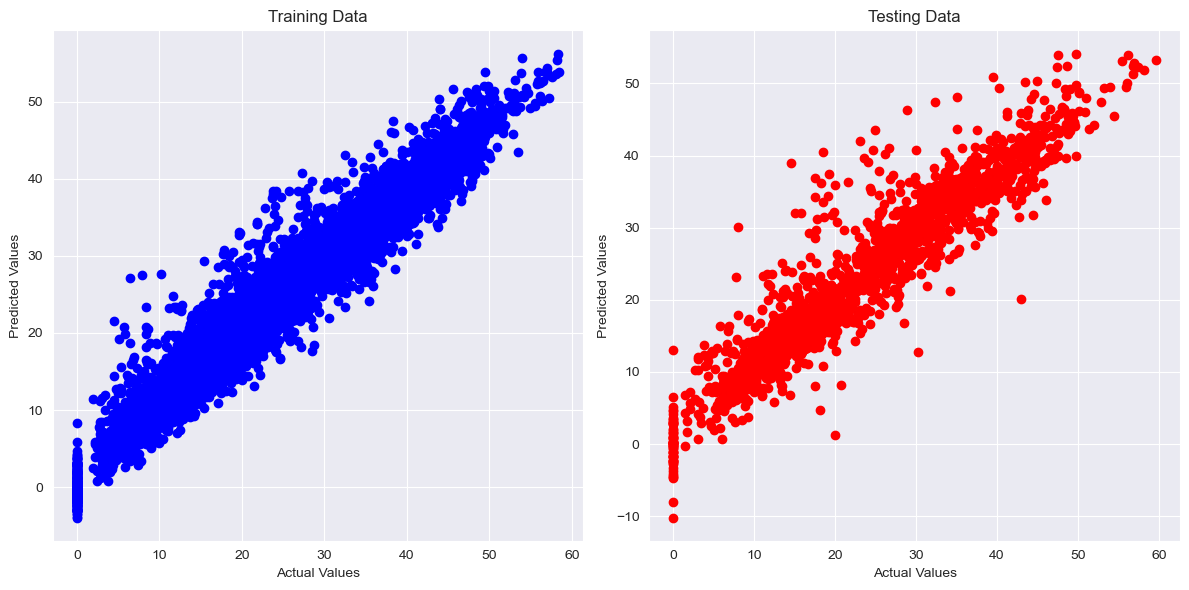

<module 'sklearn.metrics' from 'C:\\Users\\harsh\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [718]:
# evaluating the model
evaluate_model(xgb_grid)

### Model Selection:

- The XGBoost regressor stands out as the preferred choice among the models evaluated. It exhibits superior performance with substantially lower error metrics (MSE and RMSE) on both training and testing datasets compared to other models. Additionally, it achieves the highest R2 score on the test set (0.88), signifying its robustness in accurately predicting bike sharing demand. Hence, based on the evaluation metrics, the XGBoost regressor proves to be the optimal model for this task.


### Conclusion:

- Weather's Impact: Weather significantly influences bike sharing demand, with summer (37.0% rentals) thriving due to warmth and longer days, while winter lags (7.9%) due to cold and shorter daylight.
- Holiday vs. Non-holiday: Non-holidays spark high rentals (nearing 6 million) driven by commuting and recreation, contrasting reduced demand during holidays. Functioning days see peak rentals (about 6 million) for commuting and leisure.
- Seasonal Trends: Rentals peak in July (over 700,000) and dip in January (slightly above 300,000), aligning with weather conditions.
- Time-Based Insights: Commute hours (6-8 AM, 5-6 PM) and evenings (7 PM) mark peak rentals, reflecting work/school travel and recreational biking.
- Correlation Clues: Positive correlations of temperature (0.54) and hour (0.41) indicate higher rentals in hotter weather and specific times. Conversely, humidity (-0.2) and rainfall (-0.12) negatively impact rentals.
- Minor Influences: Factors like Wind Speed, Visibility, Dew Point Temperature, etc., hold relevance but wield weaker impacts on rentals.
- Model Choice: XGBoost regressor outperforms with significantly lower error metrics (MSE and RMSE) on training and testing data. It's the optimal model for precise bike sharing demand prediction, aiding in strategic business decisions.

### Future work:

- Creating models that consider what users like, how they behave, and their backgrounds can improve services, making customers happier and more likely to stick around.
- By adding data about current events, traffic, and what's happening locally, predictions about bike demand can get better, helping to change plans quickly when needed.